
# Day 12: Simulating Asset Prices with Geometric Brownian Motion (GBM)

In this notebook, we simulate asset price paths using the **Geometric Brownian Motion (GBM)** model, a widely used stochastic process in quantitative finance for modeling stock prices.

---

## Theoretical Background

Geometric Brownian Motion is defined by the stochastic differential equation:

$$
dS_t = \mu S_t \,dt + \sigma S_t \,dW_t
$$

- $S_t$ is the asset price at time $t$
- $\mu$ is the expected return (drift)
- $\sigma$ is the volatility
- $W_t$ is a Wiener process (Brownian motion)

We simulate the solution to this using the discrete approximation:

$$
S_{t+1} = S_t \cdot \exp\left((\mu - 0.5 \sigma^2) \Delta t + \sigma \sqrt{\Delta t} Z \right)
$$

where $Z \sim \mathcal{N}(0,1)$ is a standard normal random variable.

---

## Simulation and Visualization


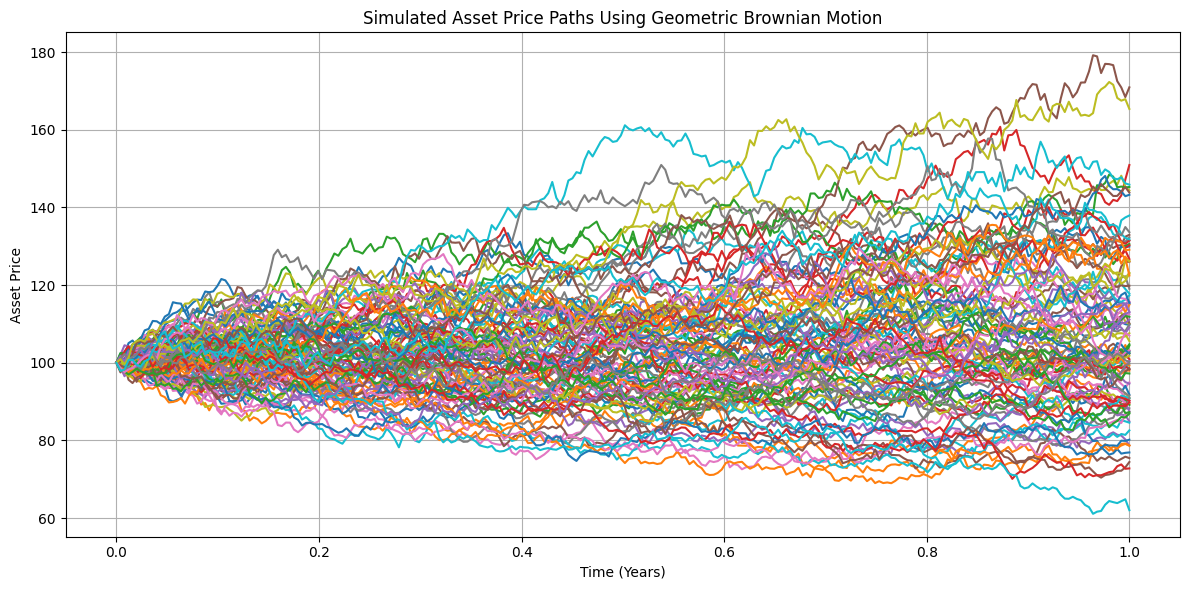

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for GBM
S0 = 100          # Initial stock price
mu = 0.07         # Expected return
sigma = 0.2       # Volatility
T = 1.0           # Time in years
dt = 1/252        # Daily steps
N = int(T / dt)   # Number of time steps
n_simulations = 100  # Number of simulated paths

# Time vector
time = np.linspace(0, T, N)

# Simulate GBM paths
price_paths = np.zeros((N, n_simulations))
price_paths[0] = S0

for i in range(1, N):
    Z = np.random.standard_normal(n_simulations)  # random normal variables
    price_paths[i] = price_paths[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Convert to DataFrame
gbm_df = pd.DataFrame(price_paths, index=time)
gbm_df.index.name = "Time"

# Plot
plt.figure(figsize=(12, 6))
plt.plot(gbm_df)
plt.title("Simulated Asset Price Paths Using Geometric Brownian Motion")
plt.xlabel("Time (Years)")
plt.ylabel("Asset Price")
plt.grid(True)
plt.tight_layout()
plt.show()
